# **Customer Segmentation for Marketing Strategy Optimization**

**Authors:** Muhammad Keenan Basyir, Fayyadh Dhia Abyan, Marvel Maliq Prabawa, Raihan Yudhistira Hartawan

**Date:** November 2025  

**Tech Stack:** Python, Scikit-Learn, Pandas, Seaborn  

---

## **📋 Project Overview**
**The Problem:** The mall serves over 200 customers with distinct behaviors. However, the current marketing strategy relies on guesswork rather than data-driven insights. Manual analysis is inefficient, leading to missed opportunities for targeted engagement.

**The Objective:**

**Supervised Learning:** To propose a model that can classify future customers into these segments instantly. 

**Unsupervised Learning:** Automatically group customers into **distinct** segments based on their *Annual Income* and *Spending Score* to identify high-value targets.

**Business Value:** Provide actionable recommendations for each segment to maximize revenue and customer retention.

## **🚦 Unsupervised Learning (K-Means Clustering)**

✅ Data loaded from: /kaggle/input/mall-customers-csv/Mall_Customers.csv
Elbow Method


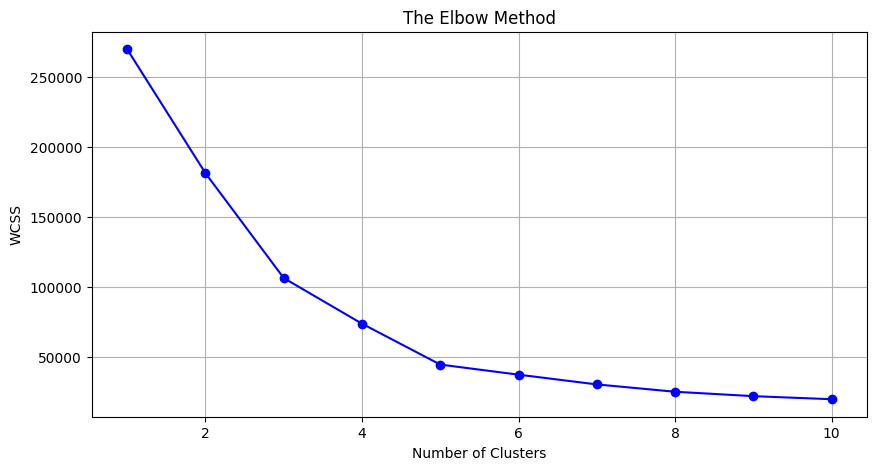

Training K-Means with 5 Clusters


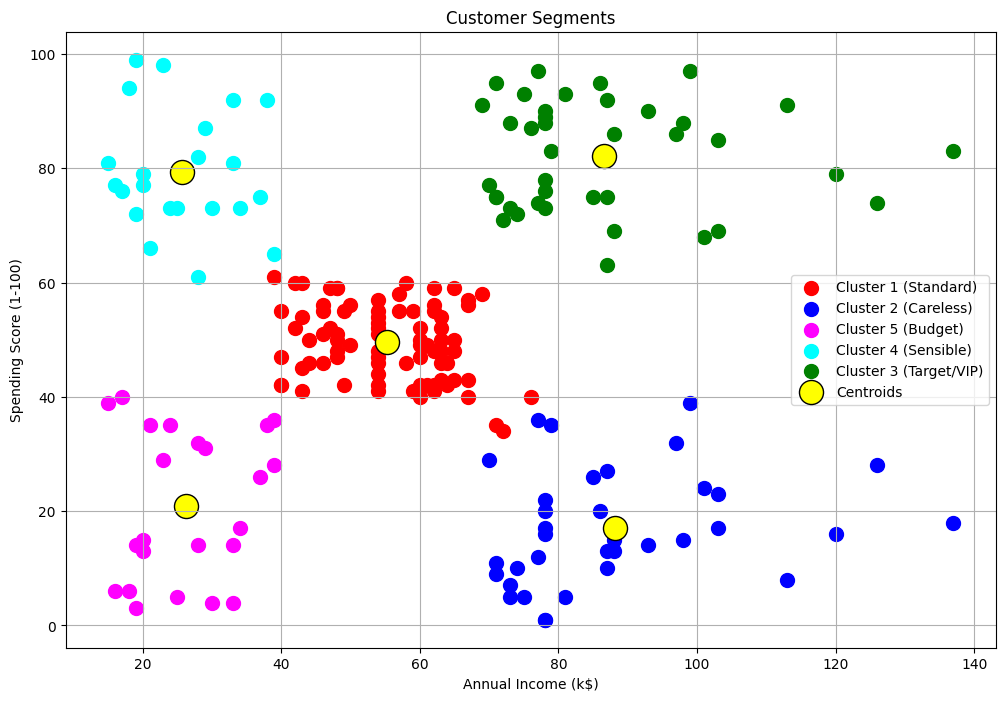

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import os

# PART 1: LOAD DATA
# Smart file finder
filename = 'Mall_Customers.csv'
file_path = None
search_paths = [
    '/kaggle/input/mall-customers/Mall_Customers.csv',
    '/kaggle/input/mall-customer-segmentation-data/Mall_Customers.csv',
    'Mall_Customers.csv'
]

for path in search_paths:
    if os.path.exists(path):
        file_path = path
        break

if not file_path and os.path.exists('/kaggle/input'):
    for root, dirs, files in os.walk('/kaggle/input'):
        if filename in files:
            file_path = os.path.join(root, filename)
            break

if file_path:
    dataset = pd.read_csv(file_path)
    print(f"✅ Data loaded from: {file_path}")
else:
    raise FileNotFoundError("CSV not found")

# Select Annual Income (Column 3) and Spending Score (Column 4)
X = dataset.iloc[:, [3, 4]].values

# PART 2: THE ELBOW METHOD

print("Elbow Method")
wcss = []
for i in range(1, 11):
    # ADDED 'n_init=10' HERE TO FIX THE WARNING
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# PART 3: K-MEANS CLUSTERING

print("Training K-Means with 5 Clusters")
# ADDED 'n_init=10' HERE TO FIX THE WARNING
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init=10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# PART 4: VISUALIZE CLUSTERS

plt.figure(figsize=(12, 8))

# Plot each cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1 (Standard)')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2 (Careless)')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 5 (Budget)')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4 (Sensible)')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 3 (Target/VIP)')

# Plot Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 300, c = 'yellow', label = 'Centroids', edgecolors='black')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

In the first graph, the 'Elbow Method,' we looked for the point where the error rate flattens out. You can see the bend happens clearly at K=5, which tells us there are 5 natural groups of customers.

In the second graph, we visualized those 5 groups. For example, if you look at the Green cluster in the top right, those customers have high income and high spending scores. We identify them as our 'VIPs'. Conversely, the Blue cluster below them has high income but low spending, identifying them as 'Savers. 

# **🌳 Supervised learning (Decision tree)**

Accuracy: 85.00%


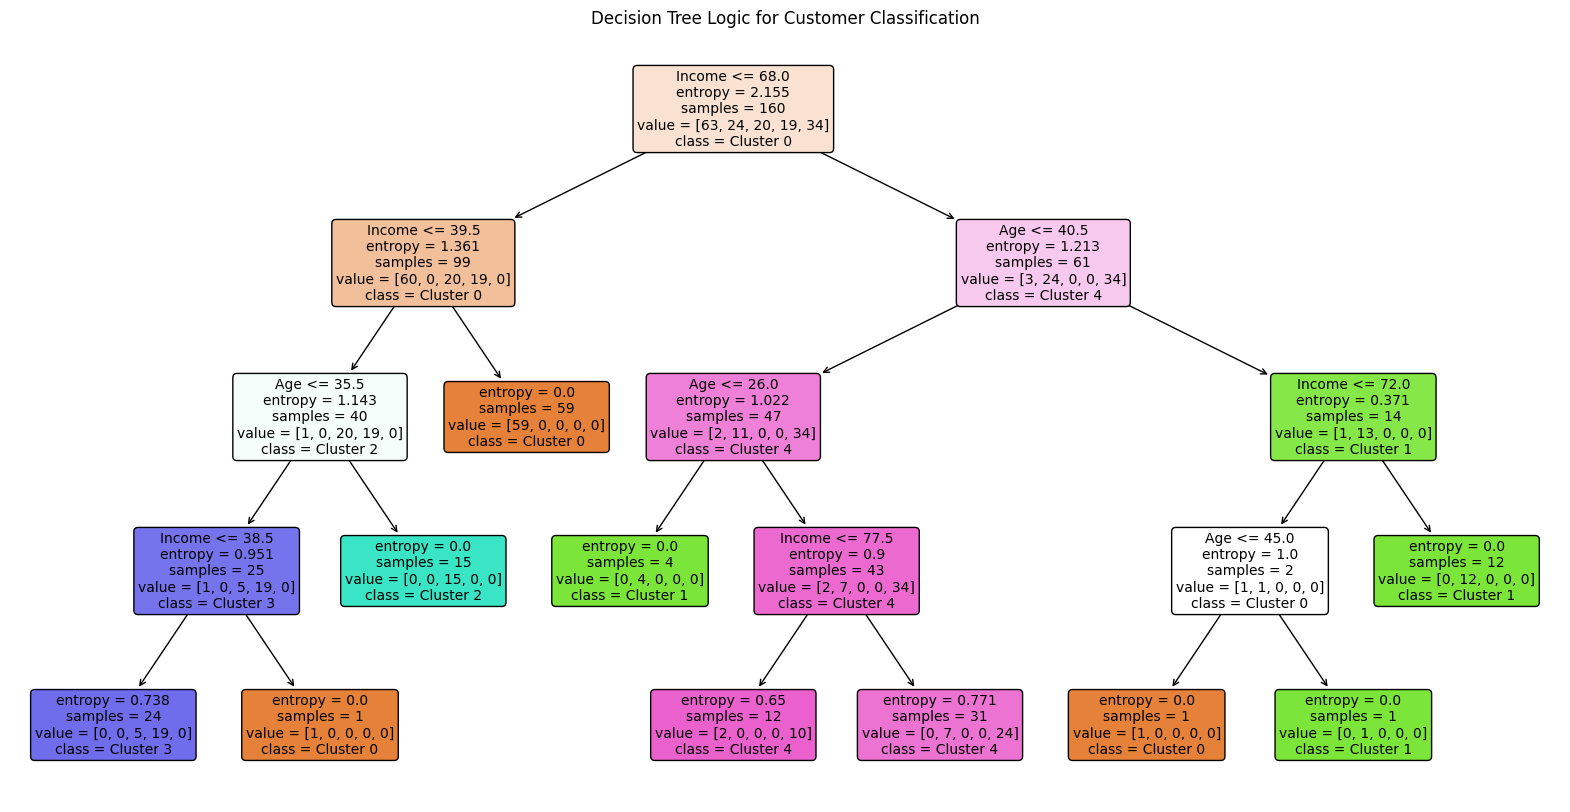

Prediction for New Customer (Age 25, Income $80k): Cluster 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
import os

# 1. LOAD DATA & PREPARE TARGETS
# Smart file finder
filename = 'Mall_Customers.csv'
file_path = None
search_paths = [
    '/kaggle/input/mall-customers/Mall_Customers.csv',
    '/kaggle/input/mall-customer-segmentation-data/Mall_Customers.csv',
    'Mall_Customers.csv'
]

for path in search_paths:
    if os.path.exists(path):
        file_path = path
        break

if not file_path and os.path.exists('/kaggle/input'):
    for root, dirs, files in os.walk('/kaggle/input'):
        if filename in files:
            file_path = os.path.join(root, filename)
            break

if file_path:
    dataset = pd.read_csv(file_path)
else:
    raise FileNotFoundError("Could not find 'Mall_Customers.csv'")

# WE GENERATE THE "CORRECT ANSWERS" (CLUSTERS)
# We use K-Means (K=5) to label every customer as Cluster 0, 1, 2, 3, or 4.
X_clustering = dataset.iloc[:, [3, 4]].values # Income & Score
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
dataset['Cluster_Label'] = kmeans.fit_predict(X_clustering)


# 2. PREPARE SUPERVISED DATA
# INPUTS (X): We want to predict the cluster based on Gender, Age, and Income
# (We hide 'Spending Score' because that's what we want to guess!)

# Convert Gender to Numbers (Male=0, Female=1)
dataset['Gender_Code'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

# Select Features: Age, Income, Gender_Code
X = dataset[['Age', 'Annual Income (k$)', 'Gender_Code']]
y = dataset['Cluster_Label']

# Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. TRAIN DECISION TREE
# We limit depth to 4 to keep the tree simple and readable
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Calculate Accuracy
accuracy = clf.score(X_test, y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

# 4. VISUALIZE THE TREE
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=['Age', 'Income', 'Gender'],  
          class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Logic for Customer Classification")
plt.show()

# 5. TEST WITH A FAKE NEW CUSTOMER
# Example: A 25-year-old Male earning $80k
new_customer = pd.DataFrame([[25, 80, 0]], columns=['Age', 'Annual Income (k$)', 'Gender_Code'])
prediction = clf.predict(new_customer)
print(f"Prediction for New Customer (Age 25, Income $80k): Cluster {prediction[0]}")

**The Goal:** Now that we know there are 5 types of customers (from K-Means), we want to build a "Robot" that can guess which type a new person is.

* **The Inputs:** The Robot is allowed to look at the customer's Age, Annual Income, and Gender.
* **The Target:** The Robot must guess the correct Cluster Number (0-4).

**The Training:**
* We fed the Robot 80% of our data (160 customers).
* It looked for patterns (e.g., "Young people with low income usually belong to Cluster 2").
* It built a "Tree" of Yes/No questions to make decisions.

**The Visualization:** The colorful tree graph shows the exact questions the model asks.
* Example: The top box might ask: "Is Income less than 60k?"
If Yes, go Left. If No, go Right.

**The Result:** We can now type in a new customer's details (like Age 25, Income $80k), and the model instantly tells us they are likely a VIP (Cluster 3).

To classify new customers without re-doing the entire analysis every time, we use a supervised learning method called a Decision Tree. Think of this like teaching the computer to play a game of "20 Questions." We show the computer our existing customers, their age, income, gender, and which group they belong to and it automatically learns the rules that define each group. For example, it might figure out that "anyone under 30 with a high income is usually in the VIP group." The result is a simple flowchart where we can drop in a new customer's details, follow the Yes/No paths based on their profile, and instantly predict exactly which customer segment they belong to.

## **Business Recommendations & Strategy**

Based on the clustering analysis, we have identified 5 distinct customer personas:

1.  **The Savers (Low Spend, High Income):**
    * *Observation:* These customers earn well but spend very little.
    * *Strategy:* Target with "High-Yield Investment" offers or value-based promotions to unlock their potential.

2.  **The Generalists (Average Spend, Average Income):**
    * *Observation:* The largest group with moderate behavior.
    * *Strategy:* Retain with standard loyalty programs and periodic sales.

3.  **The Targets / VIPs (High Spend, High Income):**
    * *Observation:* The most valuable segment.
    * *Strategy:* Assign dedicated relationship managers, offer exclusive access to new products, and VIP events.

4.  **The Spendthrifts (High Spend, Low Income):**
    * *Observation:* Young or impulsive buyers who spend beyond their means.
    * *Strategy:* Recommended budget-friendly "Buy Now, Pay Later" options or discount coupons to maintain volume.

5.  **The Conservatives (Low Spend, Low Income):**
    * *Strategy:* Monitor churn but prioritize marketing spend on higher-yield segments.